In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [4]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
trainy[0]

9

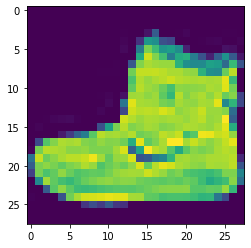

In [6]:
#above shows that corresponding values of class 9 is at first element in trainX
#plot the first item in trainX
plt.imshow(trainX[0])


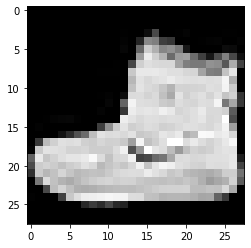

In [7]:
#that is,ankle boot is the class 9 item and it is plot in color by matplotlib.Actually it is a grey color imageset.
#plot this image to grey color
plt.imshow(trainX[0],cmap = 'gray')


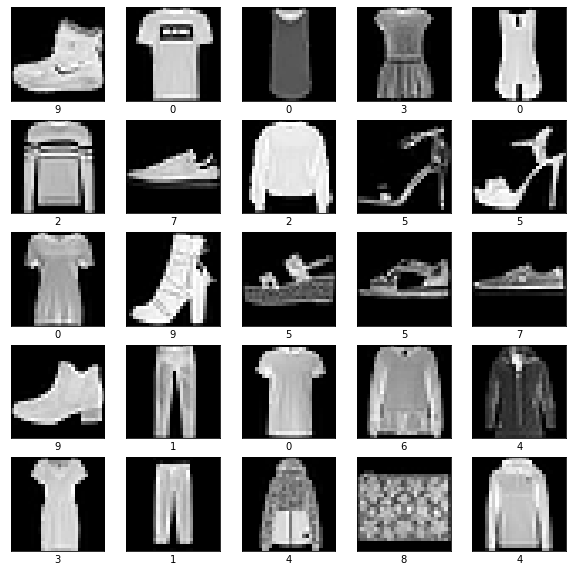

In [8]:
#plot the first 25 items and their classes.
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap='gray')
   
    plt.xlabel(trainy[i])
plt.show()


In [9]:
#devide trainX and testX by 255 for scale it to values between 0 and 1.
#it helps to to reduce the training time
trainX = trainX / 255
testX = testX / 255
#print first element in trainX
print(trainX[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [10]:
# each image have 28 rows and 28 columns.we give these image as input.so we want give 28*28=784 vector value.for that we doing some flattening operations.
trainX.shape

(60000, 28, 28)

In [11]:
trainX_flattened = trainX.reshape(len(trainX), 28*28)
testX_flattened = testX.reshape(len(testX), 28*28)

In [12]:
#do y values by one hot encoding using to_categorical function.so get class values to either 0 or 1.
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [13]:
#we create a neural network have 32 hidden layer and 10 output neuron
#actvation function relu help to pass the negative values to zero and positive values in the same values(positive)
#activation function softmax help to sum all the 10 values to value=1
model = Sequential()
model.add(layers.Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#fit the model
history = model.fit(trainX_flattened, trainy,validation_data=(testX_flattened, testy),  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5559 - accuracy: 0.8115 - val_loss: 0.4749 - val_accuracy: 0.8373
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4200 - accuracy: 0.8539 - val_loss: 0.4353 - val_accuracy: 0.8458
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3821 - accuracy: 0.8661 - val_loss: 0.4011 - val_accuracy: 0.8618
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3626 - accuracy: 0.8710 - val_loss: 0.4044 - val_accuracy: 0.8576
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3465 - accuracy: 0.8773 - val_loss: 0.3808 - val_accuracy: 0.8653
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.8808 - val_loss: 0.4030 - val_accuracy: 0.8527
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3244 - accuracy: 0.8830 - val_loss: 0.3686 - val_accuracy:

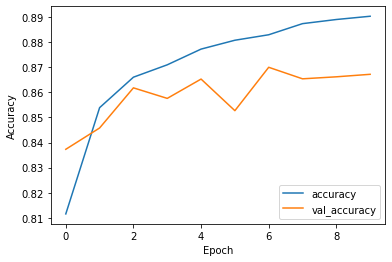

In [15]:
#we get validation accuracy of 86.72%
#plot the accuracy and val_accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

In [16]:
#we extract some features in images using 32 neurons and then it flattened to a  ----it means that it has 3*3 kernel.
#single vector.
#Conv2D(32, (3, 3) ----it means that it has 3*3 kernel.
#input_shape=(28, 28, 1)----it means that it has 28*28 pixels in one dimension.
#we create a neural network have 32 hidden layer and 10 output neuron.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
#compile this model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#fit the data without flattened but one hot encoded data
history = model.fit(trainX, trainy, epochs=10,  validation_data=(testX, testy), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4372 - accuracy: 0.8464 - val_loss: 0.3484 - val_accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3000 - accuracy: 0.8935 - val_loss: 0.3203 - val_accuracy: 0.8838
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2584 - accuracy: 0.9068 - val_loss: 0.2886 - val_accuracy: 0.8960
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2289 - accuracy: 0.9169 - val_loss: 0.2712 - val_accuracy: 0.9040
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2062 - accuracy: 0.9261 - val_loss: 0.2720 - val_accuracy: 0.9054
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1863 - accuracy: 0.9321 - val_loss: 0.2689 - val_accuracy: 0.9060
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1684 - accuracy: 0.9380 - val_loss: 0.2722 -

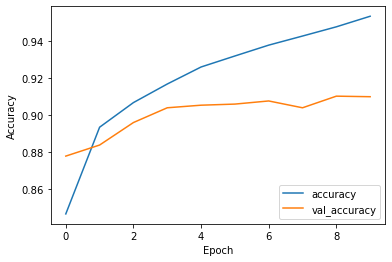

In [18]:
#we get validation accuracy of 91%
#so get 3% increase in accuracy by adding a single convolutional network.
#plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [20]:
from tensorflow.keras.utils import plot_model
model_img_file = 'model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
pip install graphviz

In [25]:
#evaluate model by passing test values.
test_loss, test_acc = model.evaluate(testX,  testy, verbose=2)

313/313 - 1s - loss: 0.2975 - accuracy: 0.9100 - 1s/epoch - 4ms/step


([], <a list of 0 Text major ticklabel objects>)

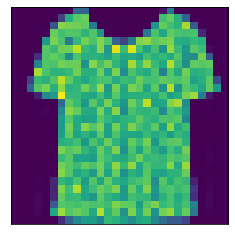

In [26]:
#we get accuracy of 90.49%
#plot the 1000 nth element in test values.
plt.imshow(testX[1000])
plt.xticks([])
plt.yticks([])

In [27]:
#print 1000 nth label
print(testy[1000])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
#it shows that class is zero
#print the name of class zero item
class_names[0]

'T-shirt/top'

In [29]:
#y_pred
sample = testX[1000].reshape(1,28,28)
y_pred = model.predict(sample)

1/1 [==============================] - 0s 117ms/step


In [30]:
y_pred

array([[2.4687886e-01, 1.8758538e-10, 3.3156164e-07, 2.7295569e-06,
        1.6148296e-06, 5.2791565e-06, 7.5310856e-01, 3.8210213e-11,
        2.5710083e-06, 1.7373663e-08]], dtype=float32)

In [31]:
#to find maximum value at which position in the array
np.argmax(y_pred)

6

In [32]:
class_names[0]


'T-shirt/top'

#it show that our machine learning algorithm coreectly classified this image as T-shirt/top.